# Import all zillow rent indices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#filepath input is for if directories are different on each machine


#if csvs are in same directory as notebook, set filepath = './'
# filepath = input('Enter file path where csv files are located on your machine\n')
filepath = '../../renycdsa7parkcapstonekickoff'

# my filepath is ../../renycdsa7parkcapstonekickoff

multi = pd.read_csv(filepath + '/Zip_Zri_MultiFamilyResidenceRental.csv',dtype = {'RegionName':str})
# homes = pd.read_csv(filepath + '/Zip_Zri_AllHomesPlusMultifamily.csv',dtype = {'RegionName':str})
# single = pd.read_csv(filepath + '/Zip_Zri_SingleFamilyResidenceRental.csv',dtype = {'RegionName':str})

def zero_zips(df):
    '''Adds zeros to beginning of zip codes that were chopped off when of int dtype
    
    Args:
    
    df: name of the DataFrame'''
    return df['RegionName'].apply(lambda Z: '0'*(5-len(Z))+Z)

multi['RegionName'] = zero_zips(multi)
# homes['RegionName'] = zero_zips(homes)
# single['RegionName'] = zero_zips(single)

print(multi.shape)
# print(single.shape)
# print(homes.shape)

(1861, 120)


In [2]:
multi = pd.melt(multi, id_vars =multi.columns[:7],
                value_vars = multi.columns[7:],
               var_name = 'Date',value_name = 'Rent')
multi['Date'] = pd.to_datetime(multi['Date'])
multi.rename(columns = {'RegionName':'Zipcode'}, inplace = True)



multi.sample(10)

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Rent
33886,72359,33021,Hollywood,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,389,2012-03-01,NaN
12661,82261,55411,Minneapolis,MN,Minneapolis-St. Paul-Bloomington,Hennepin County,1496,2011-03-01,NaN
182482,62044,11234,New York,NY,New York-Newark-Jersey City,Kings County,105,2018-11-01,2049.0
68795,78023,46204,Indianapolis,IN,Indianapolis-Carmel-Anderson,Marion County,1800,2013-09-01,NaN
52752,70875,30097,Duluth,GA,Atlanta-Sandy Springs-Roswell,Gwinnett County,645,2013-01-01,NaN
160483,84639,60639,Chicago,IL,Chicago-Naperville-Elgin,Cook County,438,2017-11-01,1309.0
99459,88482,70118,New Orleans,LA,New Orleans-Metairie,Orleans Parish,827,2015-02-01,NaN
49572,96378,91355,Santa Clarita,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,1187,2012-11-01,NaN
111447,99145,97232,Portland,OR,Portland-Vancouver-Hillsboro,Multnomah County,1649,2015-08-01,NaN
150103,90786,75234,Farmers Branch,TX,Dallas-Fort Worth-Arlington,Dallas County,1224,2017-05-01,NaN


## Select Austin, TX data

In [3]:
austin = multi.loc[(multi['City'] == 'Austin') & (multi['State']=='TX')].set_index('Date')

austin.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent
Date,,,,,,,,
2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0
2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0
2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,NaN
2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0
2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0


In [4]:
# plt.figure(figsize = (15,10))
# import seaborn as sns
# sns.scatterplot(data=austin_slice, x = austin_slice.index, y = 'Rent', hue = 'Zipcode')

Text(0.5, 1.0, 'Number of complete cases over time')

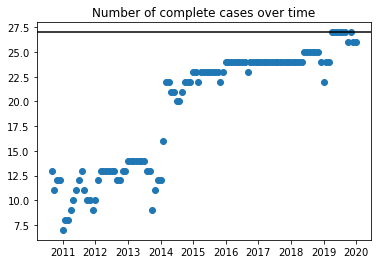

In [5]:
find_zips = austin.reset_index().set_index('Zipcode')
missing_zips =find_zips[['Date','Rent']].loc[find_zips['Rent'].isnull()]
graph_nulls = missing_zips['Date'].value_counts()

# plt.scatter(graph_nulls.index,graph_nulls)


full_zips = find_zips[['Date','Rent']].loc[~find_zips['Rent'].isnull()]
graph_full = full_zips['Date'].value_counts()

plt.scatter(graph_full.index,graph_full)
plt.axhline(y = 27,color = 'k')
plt.title('Number of complete cases over time')

## Impute for each zip code

In [6]:
fill_rents = austin[['Zipcode','Rent']].copy()
austin.drop('Rent', axis = 1, inplace = True)
fill_rents = fill_rents.reset_index().pivot(index = 'Date',columns = 'Zipcode')['Rent'].reset_index()
    
fill_rents.fillna(method = 'ffill',inplace = True)


In [7]:
fill_rents = pd.melt(fill_rents, id_vars='Date', value_vars = fill_rents.columns[1:],var_name='Zipcode',value_name = 'Rent')

fill_rents.head()

,Date,Zipcode,Rent
0,2010-09-01,78701,1524.0
1,2010-10-01,78701,1533.0
2,2010-11-01,78701,1562.0
3,2010-12-01,78701,1595.0
4,2011-01-01,78701,1616.0


In [8]:
austin = pd.merge(austin, fill_rents, on = ['Date','Zipcode'])

# Importing data from BLS and BEA

In [9]:
# labor = pd.read_excel('~/Downloads/atx_laborforce.xlsx',skiprows=10)


# labor = pd.melt(labor, id_vars = 'Year', value_vars = labor.columns[1:],var_name = 'Month', value_name = 'LaborForce')

# labor.sample(15)

In [10]:
personal = pd.read_csv('~/Downloads/atx_personal.csv',skiprows = 4)

personal.head()

,GeoFips,GeoName,LineCode,Description,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",1.0,Personal income (thousands of dollars),52344576.0,58694122.0,62599379.0,67819889.0,65884392.0,70355303.0,77881693.0,85635903.0,88954305.0,97179427.0,103077251.0,108054841.0,118651329.0,129146253.0,138028065.0
1,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",2.0,Population (persons) 1/,1453358.0,1515485.0,1577856.0,1633870.0,1682338.0,1727502.0,1780535.0,1834586.0,1883315.0,1942467.0,2002134.0,2062016.0,2115475.0,2165497.0,2227083.0
2,12420,"Austin-Round Rock-Georgetown, TX (Metropolitan...",3.0,Per capita personal income (dollars) 2/,36016.0,38730.0,39674.0,41509.0,39162.0,40727.0,43741.0,46679.0,47233.0,50029.0,51484.0,52403.0,56087.0,59638.0,61977.0
3,Legend / Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/ Census Bureau midyear population estimates....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# leisure = pd.read_excel('~/Downloads/atx_leisure.xlsx',skiprows = 12)
# leisure.head(12)

# leisure = pd.melt(leisure, id_vars = 'Year', value_vars = leisure.columns[1:],var_name = 'Month', value_name = 'NumEmp')
# leisure['NumEmp'] = leisure['NumEmp'].apply(lambda N: N*1000)
# leisure.sample(15)

# atx = pd.merge(labor,leisure, on = ['Year','Month'])
# atx.sample(15)

# atx.to_csv('atx_leisure_labor.csv',index=False)

In [12]:
personal= personal.loc[:2,:]
personal = pd.melt(personal, id_vars = 'Description', value_vars = personal.columns[4:],var_name='Year')

personal.head()

,Description,Year,value
0,Personal income (thousands of dollars),2005,52344576.0
1,Population (persons) 1/,2005,1453358.0
2,Per capita personal income (dollars) 2/,2005,36016.0
3,Personal income (thousands of dollars),2006,58694122.0
4,Population (persons) 1/,2006,1515485.0


In [13]:
personal = personal.pivot(index = 'Year',columns = 'Description')['value'].reset_index()

personal.columns = ['Year','Income_per_capita','Personal_income','Population']

pers_inc = personal[['Year','Income_per_capita','Population']].copy()

pers_inc.head()

,Year,Income_per_capita,Population
0,2005,36016.0,1453358.0
1,2006,38730.0,1515485.0
2,2007,39674.0,1577856.0
3,2008,41509.0,1633870.0
4,2009,39162.0,1682338.0


In [14]:
#made the csv in another directory
atx = pd.read_csv('../../renycdsa7parkcapstonekickoff/atx_leisure_labor.csv')
atx.rename(columns = {'NumEmp':'LeisureEmp'},inplace = True)

In [15]:
pers_inc['Year'] = pers_inc['Year'].astype(int)
atx = pd.merge(atx,pers_inc, how = 'left', on = 'Year')

atx.head(15)

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2011,Jan,944609.0,84800.0,43741.0,1780535.0
1,2012,Jan,973023.0,88800.0,46679.0,1834586.0
2,2013,Jan,1005093.0,94500.0,47233.0,1883315.0
3,2014,Jan,1035195.0,100300.0,50029.0,1942467.0
4,2015,Jan,1055960.0,106800.0,51484.0,2002134.0
5,2016,Jan,1095060.0,115700.0,52403.0,2062016.0
6,2017,Jan,1138412.0,119500.0,56087.0,2115475.0
7,2018,Jan,1178562.0,124100.0,59638.0,2165497.0
8,2019,Jan,1221167.0,129300.0,61977.0,2227083.0
9,2020,Jan,1253815.0,132500.0,NaN,NaN


In [16]:
import calendar

month_num = {month: index for index, month in enumerate(calendar.month_abbr) if month}

month_num

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [17]:
atx['Month'] = atx['Month'].apply(lambda M: month_num[M])

atx.sample()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
126,2016,12,1131564.0,122300.0,52403.0,2062016.0


In [18]:
atx['Date'] = atx[['Year','Month']].apply(lambda D: '-'.join(D.values.astype(str)), axis = 1)
atx['Date'] = pd.to_datetime(atx['Date'])

In [19]:
atx.head()

,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population,Date
0,2011,1,944609.0,84800.0,43741.0,1780535.0,2011-01-01
1,2012,1,973023.0,88800.0,46679.0,1834586.0,2012-01-01
2,2013,1,1005093.0,94500.0,47233.0,1883315.0,2013-01-01
3,2014,1,1035195.0,100300.0,50029.0,1942467.0,2014-01-01
4,2015,1,1055960.0,106800.0,51484.0,2002134.0,2015-01-01


## Import credit card data from CFPB

In [20]:
cc_volume = pd.read_csv('~/Downloads/volume_data_Income_Level_CRC.csv')

In [21]:
#keep only the low and moderate income data

cc_volume = cc_volume.loc[cc_volume['income_level_group'].isin(['Low','Moderate'])]

cc_volume.head(10)

,month,date,vol,vol_unadj,income_level_group
2,60,2005-01,4.578106e+09,3.978007e+09,Moderate
3,60,2005-01,7.635135e+08,6.517910e+08,Low
6,61,2005-02,4.563908e+09,3.900504e+09,Moderate
7,61,2005-02,7.558710e+08,6.549358e+08,Low
10,62,2005-03,4.762458e+09,4.775794e+09,Moderate
11,62,2005-03,8.171551e+08,8.352900e+08,Low
14,63,2005-04,4.744005e+09,4.683566e+09,Moderate
15,63,2005-04,7.854169e+08,7.721479e+08,Low
18,64,2005-05,4.752915e+09,4.608128e+09,Moderate
19,64,2005-05,8.289172e+08,8.354502e+08,Low


In [22]:
cc_volume = cc_volume.pivot(index = 'date', columns = 'income_level_group')['vol'].reset_index()

cc_volume.columns = ['Date','Low_income_volume','Moderate_income_volume']

cc_volume.head()

,Date,Low_income_volume,Moderate_income_volume
0,2005-01,7.635135e+08,4.578106e+09
1,2005-02,7.558710e+08,4.563908e+09
2,2005-03,8.171551e+08,4.762458e+09
3,2005-04,7.854169e+08,4.744005e+09
4,2005-05,8.289172e+08,4.752915e+09


In [23]:
cc_volume['Date'] = pd.to_datetime(cc_volume['Date'])

In [24]:
cc_volume

,Date,Low_income_volume,Moderate_income_volume
0,2005-01-01,7.635135e+08,4.578106e+09
1,2005-02-01,7.558710e+08,4.563908e+09
2,2005-03-01,8.171551e+08,4.762458e+09
3,2005-04-01,7.854169e+08,4.744005e+09
4,2005-05-01,8.289172e+08,4.752915e+09
...,...,...,...
158,2018-03-01,8.935432e+08,4.476840e+09
159,2018-04-01,8.753101e+08,4.440339e+09
160,2018-05-01,8.904970e+08,4.571036e+09
161,2018-06-01,8.982546e+08,4.398129e+09


In [25]:
austin = pd.merge(austin,cc_volume, how = 'left', on = 'Date')

In [26]:
austin = pd.merge(austin, atx, how = 'left', on = 'Date')

In [27]:
austin.head(15)

,Date,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Rent,Low_income_volume,Moderate_income_volume,Year,Month,LaborForce,LeisureEmp,Income_per_capita,Population
0,2010-09-01,92617,78704,Austin,TX,Austin-Round Rock,Travis County,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-09-01,92654,78745,Austin,TX,Austin-Round Rock,Travis County,83,1340.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-09-01,92657,78748,Austin,TX,Austin-Round Rock,Travis County,282,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-09-01,92667,78758,Austin,TX,Austin-Round Rock,Travis County,287,907.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-09-01,92651,78741,Austin,TX,Austin-Round Rock,Travis County,304,1222.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-09-01,92662,78753,Austin,TX,Austin-Round Rock,Travis County,324,834.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
6,2010-09-01,92668,78759,Austin,TX,Austin-Round Rock,Travis County,358,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
7,2010-09-01,92653,78744,Austin,TX,Austin-Round Rock,Travis County,752,1255.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
8,2010-09-01,92634,78723,Austin,TX,Austin-Round Rock,Travis County,888,923.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-09-01,92658,78749,Austin,TX,Austin-Round Rock,Travis County,919,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
austin.to_csv('austin_data.csv', index = False)

In [29]:
austin_df = austin.drop(['RegionID','City','State','Metro','CountyName','Year','Month'],axis = 1).\
sort_values(by = 'Date').set_index('Date')

In [30]:

austin_df.head(15)

,Zipcode,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,LeisureEmp,Income_per_capita,Population
Date,,,,,,,,,
2010-09-01,78704,65,1349.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78730,1831,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78701,1749,1524.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78752,1593,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78751,1558,1060.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78754,1542,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78735,1518,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78757,1380,NaN,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN
2010-09-01,78750,1325,1012.0,3.727692e+08,2.150781e+09,NaN,NaN,NaN,NaN


In [31]:
austin_slice = austin_df['2011-01-01':'2018-07-01']

In [32]:
null_zips = austin_slice['Zipcode'].loc[austin_slice['Rent'].isnull()].unique().tolist()

austin_final = austin_slice.loc[~austin_slice['Zipcode'].isin(null_zips)]

In [76]:
austin_df[['Zipcode','Rent']].loc[austin_df['Rent'].isnull()]

,Zipcode,Rent
Date,,
2010-09-01,78730,NaN
2010-09-01,78752,NaN
2010-09-01,78754,NaN
2010-09-01,78735,NaN
2010-09-01,78757,NaN
...,...,...
2019-01-01,78727,NaN
2019-02-01,78717,NaN
2019-02-01,78727,NaN


<AxesSubplot:>

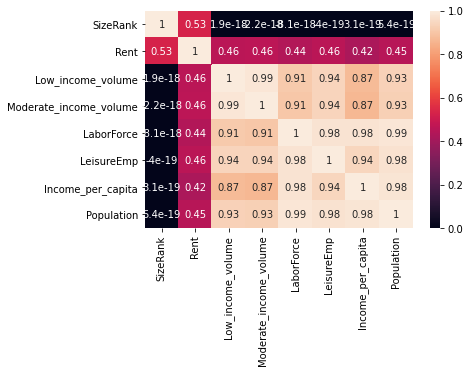

In [34]:
import seaborn as sns
austin_corrs  = austin_final.corr()
sns.heatmap(austin_corrs, annot = True)

In [35]:
austin_slice.columns

Index(['Zipcode', 'SizeRank', 'Rent', 'Low_income_volume',
       'Moderate_income_volume', 'LaborForce', 'LeisureEmp',
       'Income_per_capita', 'Population'],
      dtype='object')

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = austin_slice.drop(['Rent','Zipcode','LeisureEmp','Moderate_income_volume','Low_income_volume'],axis = 1)
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

             feature          VIF
0           SizeRank     4.782871
1         LaborForce  9004.491636
2  Income_per_capita  1490.114181
3         Population  6664.689801


In [37]:
len(austin_df['Zipcode'].value_counts())

27

In [38]:
austin_final.isnull().sum()

Zipcode                   0
SizeRank                  0
Rent                      0
Low_income_volume         0
Moderate_income_volume    0
LaborForce                0
LeisureEmp                0
Income_per_capita         0
Population                0
dtype: int64

In [39]:
austin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3051 entries, 2010-09-01 to 2020-01-01
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Zipcode                 3051 non-null   object 
 1   SizeRank                3051 non-null   int64  
 2   Rent                    2287 non-null   float64
 3   Low_income_volume       2565 non-null   float64
 4   Moderate_income_volume  2565 non-null   float64
 5   LaborForce              2943 non-null   float64
 6   LeisureEmp              2943 non-null   float64
 7   Income_per_capita       2916 non-null   float64
 8   Population              2916 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 318.4+ KB


# Predict using random forest

In [40]:
aus_forest = austin_final.copy()
aus_forest['Zipcode'] = aus_forest['Zipcode'].astype(int)

# aus_forest.drop(['Zipcode','SizeRank'],axis = 1, inplace = True)

from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor()

In [41]:
from sklearn.model_selection import train_test_split
import numpy as np
y = np.log(aus_forest['Rent'])
X = aus_forest.drop(['Rent'],axis = 1)



In [42]:
Xtrain = X.loc[X.index <'2016-12-01']
train_index = Xtrain.shape[0]
Xtest = X[train_index:]
ytrain = y[:train_index]
ytest = y[train_index:]


In [43]:
print(Xtrain.shape)
print(Xtest.shape)

(923, 8)
(260, 8)


In [44]:
rfc.fit(Xtrain,ytrain)
print(rfc.score(Xtest,ytest))

from sklearn.metrics import mean_squared_error


0.953214355465498


In [45]:
rfc.score(Xtrain,ytrain)

0.9974663506153235

In [46]:
y_pred = rfc.predict(Xtest)
RMSE = mean_squared_error(ytest,y_pred,squared = False)
print(f'RMSE:{RMSE}')

RMSE:0.03304199596288955


In [47]:
# from sklearn.model_selection import cross_validate, KFold 

# cv = KFold(n_splits = 5, shuffle = True)

In [48]:
# cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [49]:
# np.mean(cv_res['test_score'])

In [50]:
# cv_res2 = cross_validate(RandomForestRegressor(),X,y,cv = cv)

In [51]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.5187155181047447
SizeRank: 0.18591787032253765
Low_income_volume: 0.047544941367007855
Moderate_income_volume: 0.02326022666450019
LaborForce: 0.13417420870247135
LeisureEmp: 0.06286329553500448
Income_per_capita: 0.01451756633679246
Population: 0.013006372966941432


In [52]:
len(aus_forest['Zipcode'].value_counts())

13

# Try random forest using population from BigQuery

In [53]:
zipcodes = pd.read_csv('~/Downloads/zipcode_2.csv')

In [54]:
zipcodes = zipcodes[['geo_id','total_pop']]

aus_zip = zipcodes.loc[zipcodes['geo_id'].isin(aus_forest['Zipcode'])]

In [55]:
aus_zip

,geo_id,total_pop
3005,78751,15805
5735,78701,9427
9390,78705,33948
10243,78744,48969
23140,78723,34569
23274,78741,52716
23441,78750,30847
23545,78704,48486
24467,78703,20890
25856,78746,28495


In [56]:
aus_forest2 = pd.merge(aus_forest,aus_zip, left_on = 'Zipcode', right_on = 'geo_id')

In [57]:
aus_forest2.drop(['Population','geo_id'], axis = 1, inplace = True)

In [58]:
np.sum(aus_zip['total_pop'])

493478

In [59]:
aus_forest2['total_pop'].value_counts()

28495    91
48969    91
34569    91
59085    91
52716    91
15805    91
48486    91
62771    91
9427     91
33948    91
20890    91
47470    91
30847    91
Name: total_pop, dtype: int64

In [60]:
y = np.log(aus_forest2['Rent'])
X = aus_forest2.drop('Rent', axis = 1)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [61]:
rfc = RandomForestRegressor()
rfc.fit(Xtrain,ytrain)
rfc.score(Xtest,ytest)

0.9850649871867361

In [62]:
rfc.score(Xtrain,ytrain)

0.9967189614856138

In [63]:
from sklearn.model_selection import cross_validate, KFold

cv = KFold(n_splits = 5, shuffle = True)

In [64]:
cv_res = cross_validate(RandomForestRegressor(),X,y, cv = cv)

In [65]:
cv_res2 = cross_validate(RandomForestRegressor(),Xtrain,ytrain,cv = cv)

In [66]:
np.mean(cv_res['test_score'])

0.9821077931214479

In [67]:
for col, imp in zip(X.columns,rfc.feature_importances_):
    print(f'{col}: {imp}')

Zipcode: 0.47936380846084226
SizeRank: 0.05794819819878069
Low_income_volume: 0.029097846644872485
Moderate_income_volume: 0.03026917215627646
LaborForce: 0.18797061476397328
LeisureEmp: 0.0794850850086705
Income_per_capita: 0.003897314826268148
total_pop: 0.1319679599403163


## OLS

In [68]:
austin_ols = pd.get_dummies(austin_slice, columns = ['Zipcode'], drop_first = True)
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [69]:
austin_ols

,SizeRank,Rent,Low_income_volume,Moderate_income_volume,LaborForce,LeisureEmp,Income_per_capita,Population,Zipcode_78702,Zipcode_78703,...,Zipcode_78748,Zipcode_78749,Zipcode_78750,Zipcode_78751,Zipcode_78752,Zipcode_78753,Zipcode_78754,Zipcode_78757,Zipcode_78758,Zipcode_78759
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1288,1384.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1282,1466.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1325,935.0,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-01-01,1357,NaN,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,1380,NaN,3.864480e+08,2.351604e+09,944609.0,84800.0,43741.0,1780535.0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-07-01,752,1283.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,888,1386.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2018-07-01,919,1221.0,8.639582e+08,4.220966e+09,1203826.0,132200.0,59638.0,2165497.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [70]:
y = np.log(austin_ols.Rent)
X = austin_ols.drop('Rent', axis = 1)
X_cols = X.columns

In [71]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [72]:
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [73]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()

In [74]:
# ols.fit(Xtrain,ytrain)
# ols.score(Xtest,ytest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
ols_results = cross_validate(LinearRegression(),X,y, cv = cv)

In [ ]:
np.mean(ols_results['test_score'])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.plot(ols.coef_)
plt.xticks(ticks = range(len(X_cols)),labels = X_cols,rotation = 90)
plt.title('Standardized beta coefficients for predicting log(Rent)')
plt.show()

# Attempts at time series analysis

In [ ]:
token = 'Zipcode'
for code, value in austin_df.groupby(token):
            print(code)
            print(value.drop([token],axis=1).rolling(3).mean().head(10))

In [ ]:
rents = austin_slice['Rent'].loc[austin_slice['Zipcode'] == '78746'].copy()
plt.plot(rents)

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (15,10))
autocorrelation_plot(rents)
plt.ylim([0,0.5])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# rents.index = rents.index.to_period('M')
model = ARIMA(rents, order = (20,1,0))

In [ ]:
model_fit = model.fit()
print(model_fit.summary())

## Use dickey-fuller test to assess stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(rents, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [ ]:
print(dfoutput)
print('Dickey-Fuller results indicate time series is non-stationary.')

In [ ]:
first_diff = np.diff(rents)
dftest = adfuller(first_diff, autolag='AIC', maxlag = 20 )
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

In [ ]:
print(dfoutput)
print('Taking first derivative makes it stationary')

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

plt.ylim([-50,50])

In [ ]:
residuals.plot(kind='kde')

In [ ]:
residuals.describe()

In [ ]:
# split into train and test sets
from sklearn.metrics import mean_squared_error
X = rents.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(25,1,0))
    model_fit = model.fit()
    output = model_fit.forecast(typ = 'levels')
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = mean_squared_error(test, predictions)**0.5
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['actual','forecast'])
plt.show()



### NYCDSA method

In [ ]:
# from statsmodels.tsa.statespace import sarimax

In [ ]:
# sarimax()

In [ ]:
# predictions = []
# mse         = []

# for i in range(0, ret_train2.shape[0]-train_window):
#     loc   = slice(i, i+train_window)  # slice object abstracting start:end:step into an slice object
    
#     endog = ret_train2[endo_tickers].iloc[loc]
#     exog  = ret_train2[exog_tickers].iloc[loc] if useExog else None
#     new_model = VARMAX(endog=endog, exog = exog, order=order)


#     with warnings.catch_warnings():
#             warnings.filterwarnings("ignore", module='statsmodels')
#             res2 = new_model.fit(start_params=res2.params, disp=False,
#                                  maxiter=1000, method='lbfgs')
#             predicted_value = res2.predict()
            
#     mse.append(((endog-predicted_value)**2).mean(axis=0))
#     exog2 = exog.iloc[[-1]] if useExog else None
#     predictions.append(res2.forecast(1, exog = exog2))
#     if i%10 == 0:
#         print('Finish the %3d-th rolling 1-step-ahead forecast' %(i))

# predictions = pd.concat(predictions) 
# mse         = pd.concat(mse, axis=1)
# print("Terminated!")